# Energy level
> @author: Jiheng Duan, Pan Shi

## About

This document will tell you how to scan and plot energy level. Also, we will show you how to cross the avoid crossing point.

### Required Import

**The following thing must be import.**

In the current folder (despite `~\Tutorial\arb_qubit_tutorial\`), the system structure are based on file `~\System\transmon_system.py`. For using arbitrary qubit system structure, please move to the demonstration file under `~\Tutorial\arb_qubit_tutorial\`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# # This on is a path correcting code, which is used to find the path of qusim.
# sys.path.append('../..')

import qusim.System.transmon_system as qs
# Some useful tools
import qusim.Instruments.tools as tools
# Some intrinsic plotting function
import qusim.DataPlot.plot_lib as pl
# The avoid crossing tool
from qusim.Instruments.avoid_crossing import swap_avoid_crossing


### Optional import

**The following import are optional**

In [2]:
# Print the full output
np.set_printoptions(threshold=sys.maxsize)

# auto reload
%load_ext autoreload
%autoreload 2 

# variable name -> string
def var_name2str(variable):
    def nested_var_name2str(value):
        if isinstance(value, list):
            return [nested_var_name2str(item) for item in value]
        else:
            for name in globals():
                if eval(name) == value:
                    return name
            return str(value)
    return nested_var_name2str(variable)

### Set up system parameter

In [3]:
N = None # Maximum excitation level
w = [7, 5.6, 6.6] # Qubit frequency
q_dim = [4 for _ in range(len(w))]
alpha =[-0.24, -0.14, -0.24] # Anharmonicity
r_dic = {
    "r12": 0.11,
    "r13": 0.006,
    "r23": 0.11
}
r = tools.r2matrix(r_dic, w) # Coupling strength
gamma_list = None # Gamma up, Gamma down, Gamma z

### Define scanning parameter

Here, we need to define what kind of parameter we want to scan. For example, here I want to scan the coupler frequency `w2`, what should I do is define a `np.linspace()` with starting, ending points, and the simulation steps. 

Also, the number of levels you wan to simulated will also be defined. For instance, we want to see the first twenty levels: `num_level = 20`.

In [4]:
num_level = 20 # Num of level we want to see
w2_scan_space= np.linspace(5.5, 8, 800)

### Scanning

In [6]:
energy_level_list = []
for w2 in w2_scan_space:
    dummy_list = []
    w[1] = w2
    _system = qs.qubit_system(N, q_dim, w, alpha, r, gamma_list)
    for j in range(0,num_level):
        dummy_list.append((_system.H.eigenenergies()[j] / np.pi/2).real)
    energy_level_list.append(dummy_list)

### Plot the energy level

Here , we can control how many level we want to plot.

The build-in plot function `pl.plot_Elevel_dynamics(w2_scan_space, energy_level_list, 20, "\omega_c")` can be controlled by change the number of level you can to see, which is 20 here.

If you want to see less level (e.g., 3 levels), just use
`pl.plot_Elevel_dynamics(w2_scan_space, energy_level_list, 3, "\omega_c")`.

The `"\omega_c"` is the title of the x-axis, which is the axis of data `w2_scan_space`.

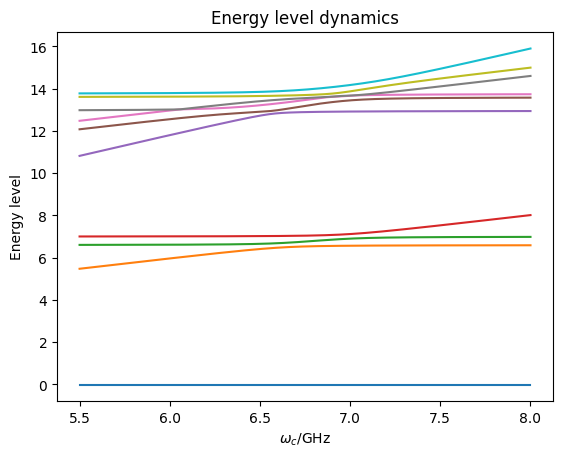

0

In [7]:
# %matplotlib qt
pl.plot_Elevel_dynamics(w2_scan_space, energy_level_list, 10, "\omega_c")

### Threshold of Avoid-crossing

If the system evolution is smooth and slow enough, which satisfies the adiabatic condition, that means the energy level will not swap at the avoid crossing points. 

But if the avoid crossing space is too narrow, we could somehow simulated the crossing of energy level happens at the avoid crossing points when the space between these two levels is smaller than a threshold.

Here, we use a build-in tool `swap_avoid_crossing` to give automatically adjust whether the level should be swap or not.

You only need to define a ``threshold`` to control the algorithm.

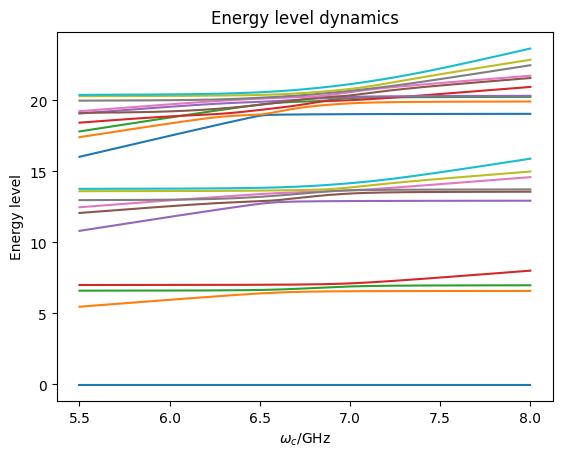

0

In [11]:
threshold  = 0.03 # GHz
energy_level_crossing = swap_avoid_crossing(energy_level_list, w2_scan_space, threshold).swap()
pl.plot_Elevel_dynamics(w2_scan_space, energy_level_crossing, 20, "\omega_c")